**AUTOMATED ESSAY SCORING: CS109A FINAL PROJECT**

By Anmol Gupta, Annie Hwang, Paul Lisker, and Kevin Loughlin

**THINGS TO CONSIDER**

- See README.md for basic guides to what's in the repository
- The training essays are scored on different scales.  Take special care that we use the right score for each set.
- We should establish how to handle anonymized data (like how they replaced business names with @ORGANIZATION1)

In [39]:
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# stopwords for English
from nltk.corpus import stopwords

# English 'dictionary'
from nltk.corpus import words

# Regular expressions might be useful
import re

# Beautiful soup might be useful
from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [40]:
# Read in training data
train_df = pd.read_csv('data/training_set_rel3.tsv', delimiter='\t')
print train_df.head()

print '\n*****\n'

# Show np extraction
train_essays_np = train_df['essay'].values
print train_essays_np.shape

   essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having computers has a...   

   rater1_domain1  rater2_domain1  rater3_domain1  domain1_score  \
0               4               4             NaN              8   
1               5               4             NaN              9   
2               4               3             NaN              7   
3               5               5             NaN             10   
4               4               4             NaN              8   

   rater1_domain2  rater2_domain2  domain2_score      ...        \
0             NaN             NaN            NaN      ...    

In [41]:
# Read in testing data
test_df = pd.read_csv('data/test_set.tsv', delimiter='\t')
#print test_df.head()

print '\n*****\n'

# Show np extraction
test_essays_np = test_df['essay'].values
print test_essays_np.shape


*****

(4254,)


In [42]:
# Read in validation data
valid_df = pd.read_csv('data/valid_set.tsv', delimiter='\t')
#print valid_df.head()

print '\n*****\n'

# Show np extraction
valid_essays_np = valid_df['essay'].values
print valid_essays_np.shape


*****

(4218,)


In [44]:
# Make english words and stoplist a set for efficiency
nltk_words_set = set(words.words())
stop_words = set(stopwords.words("english"))

# only alphabet characters in text
def alpha_only(text):
    return re.sub("[^a-zA-Z]", " ", text)

# split text into word iterable
def split_by_words(text):
    return alpha_only(text).split()

# Extracts words from text, alpha characters only and all lowercase
# Inspired by function included in Kevin's CS51 final project, adapted from Kaggle's Popcorn Movie Reviews Project
# Used in Kevin's assignment 5
def clean_essay(text):
    # Converts all letters to lower case and splits string into words
    words = alpha_only(text).lower().split()
    
    # TODO If we want to remove stop words, we can before the below
    #words = [w for w in words if not w in stop_words]

    # TODO If we want to check what is actually a word, we can do the below
    # words = [w for w in words if w in nltk_words_set]

    # Return words as string separated by space
    return (" ".join( words ))

# Gets word count
def get_word_count(text):
    return len(split_by_words(text))

In [45]:
print "Cleaning training essays..."

cleaned = []
for essay in train_essays_np:
    cleaned.append(clean_essay(essay))
train_clean = np.array(cleaned)

print "Cleaning testing essays..."

cleaned = []
for essay in test_essays_np:
    cleaned.append(clean_essay(essay))
test_clean = np.array(cleaned)

print "Cleaning validation essays..."

cleaned = []
for essay in valid_essays_np:
    cleaned.append(clean_essay(essay))
valid_clean = np.array(cleaned)

print "Done."

print train_clean.shape

Cleaning training essays...
Cleaning testing essays...
Cleaning validation essays...
Done.
(12976,)


In [46]:
# If we want to limit to the most common words in our vectorizer, set this number
# Doing so will speed things up (and potentially increase accuracy)
# None indicates no limit
max_words = None

# turns words into word vector, but note that removes stop words
vectorizer = CountVectorizer(stop_words='english', max_features=max_words)

# fit vectorizer on training data
train_vec = vectorizer.fit_transform(train_clean).toarray()

# apply vectorizer to testing and validation sets
test_vec = vectorizer.transform(test_clean).toarray()
valid_vec = vectorizer.transform(valid_clean).toarray()

print train_vec.shape
print test_vec.shape
print valid_vec.shape

(12976, 37678)
(4254, 37678)
(4218, 37678)


Calculating word counts...
Plotting data...


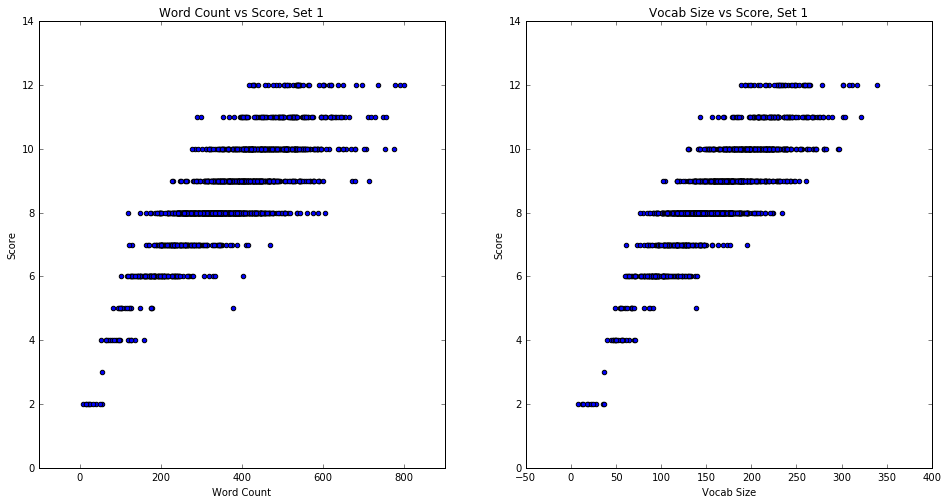

In [47]:
# This is where the graphing actually occurs

# Make a list of training essays by set
train_by_set = []
for i in xrange(8):
    train_by_set.append(train_df[train_df['essay_set'] == i + 1])

# I graph for set 1 (index 0)
texts = train_by_set[0]['essay'].values

# be aware that different essay sets have different scoring systems
# be sure to choose correct column
scores = list(train_by_set[0]['domain1_score'].values)

word_counts = []
vocabs = []

vectorizer = CountVectorizer()

print "Calculating word counts..."

# calc vocab size and word counts
for essay in texts:
    vocabs.append(vectorizer2.fit_transform(split_by_words(essay)).toarray().shape[1])
    word_counts.append(get_word_count(essay))
    
    
_, ax = plt.subplots(1, 2, figsize=(16, 8))

# plot essay set number 1 word count versus score
ax[0].set_title('Word Count vs Score, Set 1')
ax[0].set_xlabel('Word Count')
ax[0].set_ylabel('Score')
ax[0].scatter(word_counts, scores)

# plot essay set number 1 vocab size versus score
ax[1].set_title('Vocab Size vs Score, Set 1')
ax[1].set_xlabel('Vocab Size')
ax[1].set_ylabel('Score')
ax[1].scatter(vocabs, scores)

print "Plotting data..."

plt.show()